Skipping column 'sex' as it is not numerical.
Skipping column 'embarked' as it is not numerical.
Skipping column 'class' as it is not numerical.
Skipping column 'who' as it is not numerical.
Skipping column 'adult_male' as it is not numerical.
Skipping column 'deck' as it is not numerical.
Skipping column 'embark_town' as it is not numerical.
Skipping column 'alive' as it is not numerical.
Skipping column 'alone' as it is not numerical.


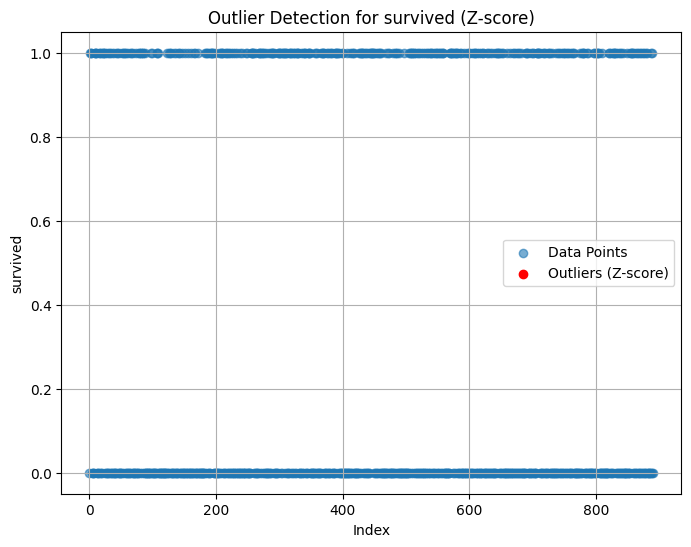

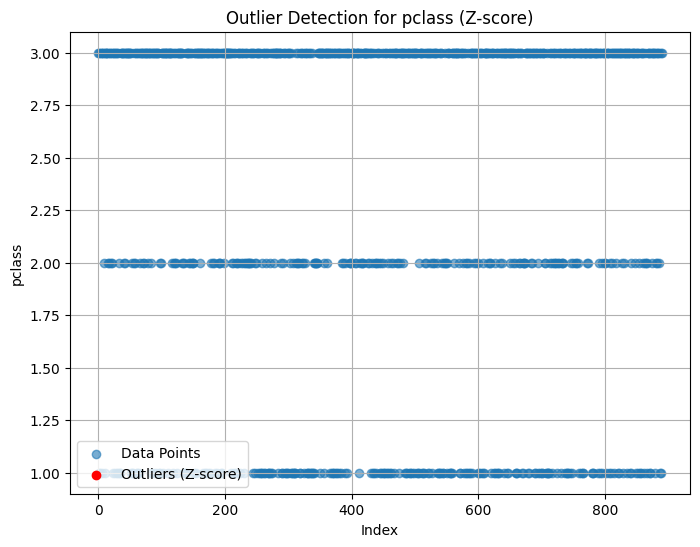

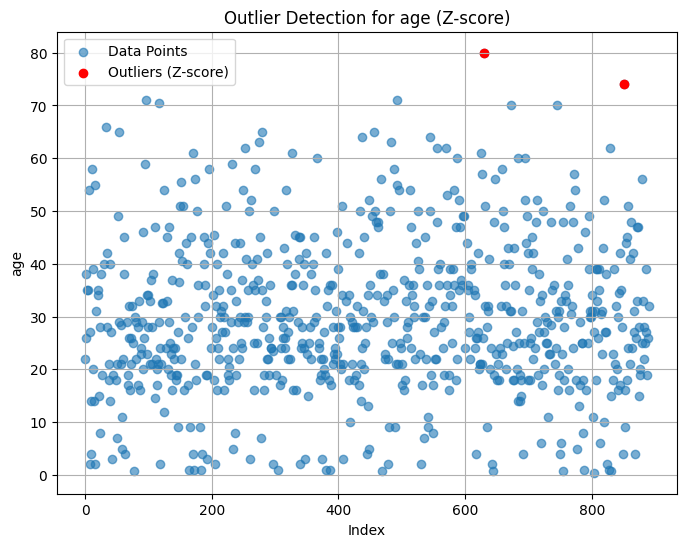

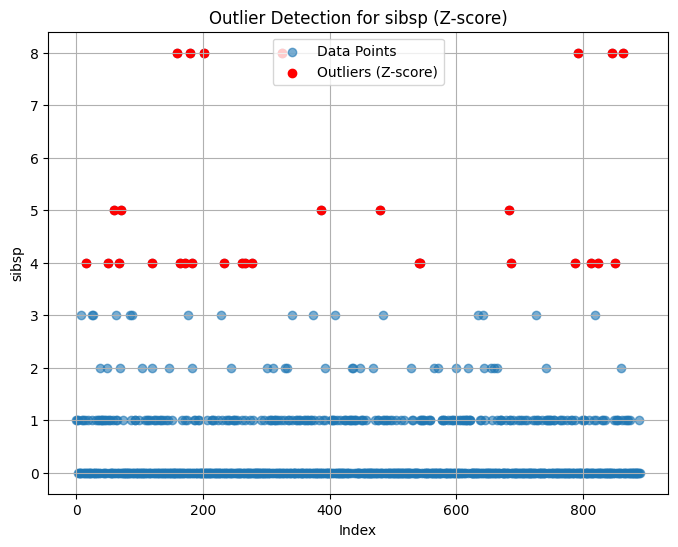

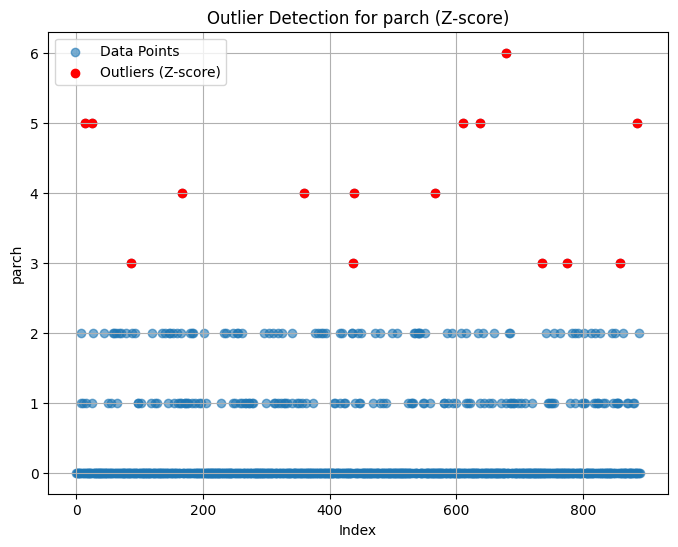

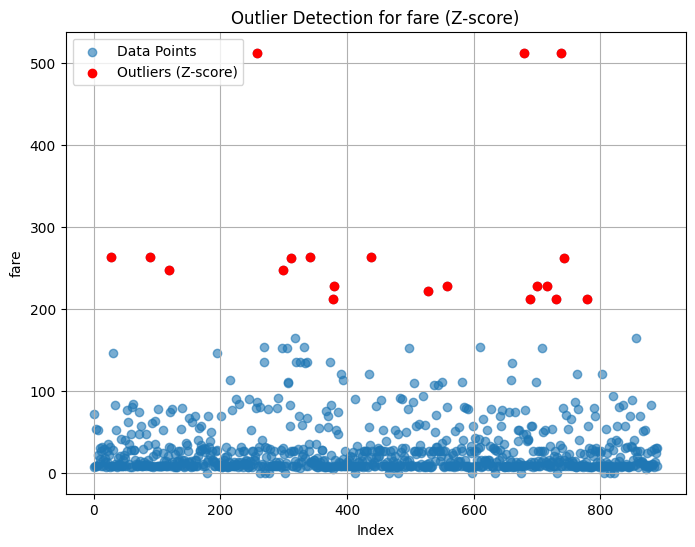

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')

def detect_outliers_zscore(df, column):
    """Detect outliers in a column using Z-score."""
    if df[column].dtype not in ['int64', 'float64']:
        print(f"Skipping column '{column}' as it is not numerical.")
        return pd.Series([False] * len(df))  # Return a series of False for non-numeric columns

    mean = df[column].mean()
    std = df[column].std()
    if std == 0: # Handle cases where standard deviation is zero (all values are the same)
        print(f"Skipping column '{column}' as standard deviation is zero.")
        return pd.Series([False] * len(df))

    z_scores = (df[column] - mean) / std
    outlier_threshold = 3  # Common threshold for Z-score
    outliers = np.abs(z_scores) > outlier_threshold
    return outliers

outlier_masks = {}
for col in titanic.columns:
    outlier_masks[col] = detect_outliers_zscore(titanic, col)

def plot_with_outliers(df, column, outliers):
    if df[column].dtype not in ['int64', 'float64']:
        return # Do not plot non-numeric columns

    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column], label='Data Points', alpha=0.6)

    # Highlighting outliers in red
    plt.scatter(df.index[outliers], df[column][outliers], color='red', label='Outliers (Z-score)', marker='o')

    plt.title(f'Outlier Detection for {column} (Z-score)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

for col in titanic.columns:
    if col in outlier_masks:
        plot_with_outliers(titanic, col, outlier_masks[col])
